In [3]:
import nltk
import tweepy
from collections import Counter
import re
import datetime

In [8]:
# Claves del consumidor y tokens de acceso, utilizados para OAuth
consumer_key = 'XXX'
consumer_secret = 'XXX'

consumer_Owner = '_Huguez'
consumer_Owner_ID = 'XXX'

access_token = 'XXX-XXX'
access_token_secret = 'XXX'


In [6]:

# Proceso de OAuth, utilizando las claves y los tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# autenticación, usando una interfaz de la api de twitter
api = tweepy.API(auth, wait_on_rate_limit=True )

In [7]:
charly = api.get_user("@charlyleonmc")

celida = api.get_user("@celidalopezc")

pato = api.get_user("@elpatodelucas")

myrna = api.get_user("@myrnarea2018")

gustavo = api.get_user("@gustavoalmadabo")

curie = api.get_user("@curielprd")

lorenzo = api.get_user("@Lorenzo_de_Cima")

everardo = api.get_user("@everardolopezc")

emeterio = api.get_user("@emeterioochoa")

titi = api.get_user("@titilo78")

sara = api.get_user("@saradessens")

pujo = api.get_user("@pujolirastorza")

gato = api.get_user("@gatobarcenas")

rodrigo = api.get_user("@rboursc")

barra = api.get_user("@barrazaalmazan")


In [8]:
can = barra
_id_ = can.id
_screen_name = can.screen_name
listaTweets = []
for tweet in tweepy.Cursor( api.user_timeline, screen_name = _screen_name,
                           wait_on_rate_limit = True, wait_on_rate_limit_notify = True,
                           exclude_replies = True, include_rts = True,
                           since = datetime.date.today() - datetime.timedelta(days=7), until = datetime.date.today(),
                          since_id = _id_ ).items( 200 ):
    if not "RT" in tweet.text and not tweet.truncated:
        if tweet.in_reply_to_status_id is None and not tweet.is_quote_status:
            listaTweets.append( tweet )
            print( tweet.user.screen_name ,tweet.text )


barrazaalmazan Un gusto conocer a @MartinHolguin y  @elbunker_sonora. Muchas gracias por la invitación. https://t.co/WxLCXNUcHr
barrazaalmazan ¡Estamos listos! #HermosilloIndependiente https://t.co/tR1vlJtIZp
barrazaalmazan Deseo que pasen a todo dar este bonito día, disfruten a su familia y amistades, un gran abrazo!! #FelizSanValentín https://t.co/9weDtdpaDZ
barrazaalmazan ¡Ya es hora de tener el gobierno que merecemos! Con tu apoyo podemos lograrlo. #FirmaBarraza https://t.co/VN00zXGFh3
barrazaalmazan ¡Cada vez estamos más cerca de lograr un gobierno capaz , justo y honesto! 
#FirmaBarraza https://t.co/uThEzDTdj3
barrazaalmazan ¡Ha llegado la hora de lograr el Hermosillo que merecemos!

Con tu firma, puedes hacer la diferencia. #FirmaBarraza https://t.co/78w7M3qe2a
barrazaalmazan Seguimos trabajando para lograr el cambio que merecemos. #FirmaBarraza https://t.co/oCFZVTfIcX
barrazaalmazan Batalla entre independientes.

https://t.co/yMjm55Gb8x
barrazaalmazan https://t.co/Uw4MeAJJz6
ba

In [40]:
print( "Los tweets obtenidos de {} fueron {}".format( can.name, len( listaTweets ) ) )

Los tweets obtenidos de Norberto Barraza Almazan fueron 16


In [21]:
text = ""
corpusMeade = open( "corpus.txt","w" )
listaTweet = list( listaTweets )

for tweet in listaTweet:
    text = tweet.text
    
    # eliminar emojis
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

    text = emoji_pattern.sub( r'', text ) 
    
    #----------eliminar mayusculas
    text = text.lower()

    #----------eliminamos email
    text = re.sub(r'[\w\.-]+@[\w\.-]+ ', "", text )
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))* ', '',  text )

    #----------eliminamos usuarios con arrobas @
    text = re.sub( r'@[a-zA-Z0-9-_.]+[a-zA-Z0-9]*', "", text)

    #----------eliminar hashtag #
    text = re.sub( r'#[a-zA-Z0-9-_.]+[a-zA-Z0-9]*', "", text )

    #----------eliminar links
    text = re.sub( r'https://[a-zA-Z0-9-_./]+[a-zA-Z0-9]*', "", text )


    #----------eliminar los signos de puntuacion
    puncList = [".", ";", ":", "!", "?", "/", "\\", ",", ")", "(", "\""]
    for pun in puncList:
        if pun in text:
            text = text.replace( pun, '' )
    
    
    corpusMeade.write( " "+text+" " )
    
corpusMeade.close()

Cantidad de palabras en el texto:  143

Palabras más populares:
 [('de', 7), ('la', 5), ('el', 4), ('que', 4), ('merecemos', 3), ('tu', 3), ('y', 3), ('a', 3), ('un', 3), ('lograr', 3), ('seguimos', 2), ('firmas', 2), ('hora', 2), ('es', 2), ('firma', 2), ('los', 2), ('independientes', 2), ('con', 2), ('más', 2), ('en', 2), ('gobierno', 2), ('¡estamos', 1), ('vez', 1), ('apoyo', 1), ('ín', 1), ('bonito', 1), ('presumen', 1), ('su', 1), ('gran', 1), ('honesto', 1), ('abrazo', 1), ('¡ha', 1), ('todo', 1), ('tener', 1), ('stco5xkqcwbglo', 1), ('mil', 1), ('stcoqjfafqrh0v', 1), ('15', 1), ('por', 1), ('amistades', 1), ('día', 1), ('al', 1), ('entre', 1), ('norberto', 1), ('pasen', 1), ('recolección', 1), ('listos', 1), ('este', 1), ('justo', 1), ('diferentes', 1)]


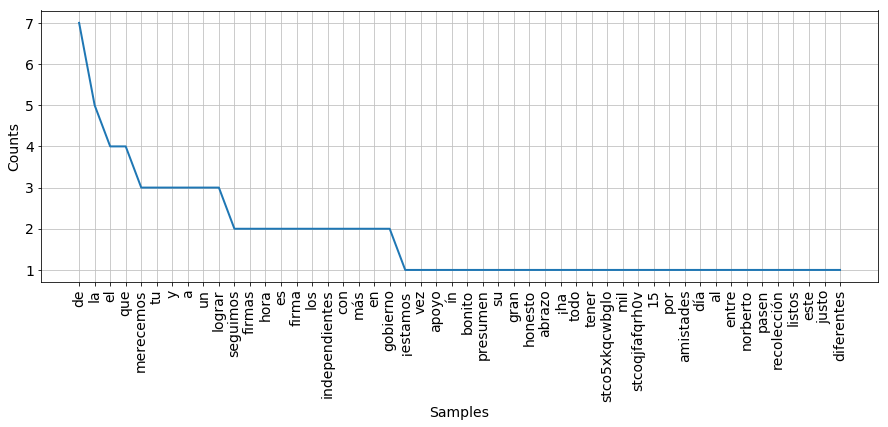

In [22]:
file = open( "corpus.txt","r" )
anaconda = file.read()
file.close()

anaconda = anaconda.split()
most_common_words = nltk.FreqDist(anaconda)

print( "Cantidad de palabras en el texto: ", most_common_words.N() )
print( "\nPalabras más populares:\n", most_common_words.most_common( 50 ) )

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(15, 5))

most_common_words.plot(50, cumulative=False)


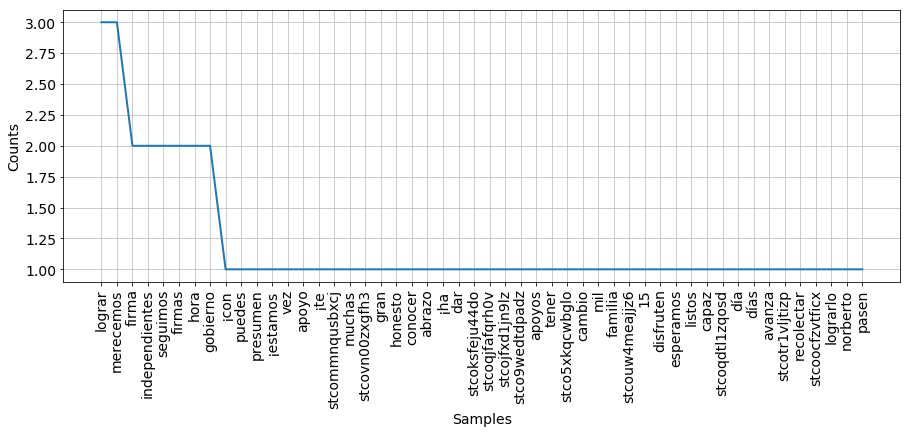

In [23]:
from nltk.corpus import stopwords

sw = set(stopwords.words("spanish"))
anaconda = [w for w in anaconda if not w in sw]

sw = set(stopwords.words("english"))
anaconda = [w for w in anaconda if not w in sw]

anaconda = [ w for w in anaconda if not w == 'rt' ]

most_common_words = nltk.FreqDist( anaconda )

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)

In [26]:

counts = Counter(x for x in anaconda )

print( "Veces que {} hablo de Seguridad: {}".format( can.name, counts["seguridad"] ) )
print( "Veces que {} hablo de Corrupción: {}".format( can.name, counts["corrupción"] ) )
print( "Veces que {} hablo de Oportunidad: {}".format( can.name, counts["oportunidad"] ) )
print( "Veces que {} hablo de Educación: {}".format( can.name, counts["educación"] ) )
print("Veces que {} hablo de trabajo: {}".format( can.name, counts["trabajo"] ) )

Veces que Norberto Barraza Almazan hablo de Seguridad: 0
Veces que Norberto Barraza Almazan hablo de Corrupción: 0
Veces que Norberto Barraza Almazan hablo de Oportunidad: 0
Veces que Norberto Barraza Almazan hablo de Educación: 0
Veces que Norberto Barraza Almazan hablo de trabajo: 0
